In [15]:
import numpy as np
import matplotlib.pyplot as plt

### Stepsizes as large as possible

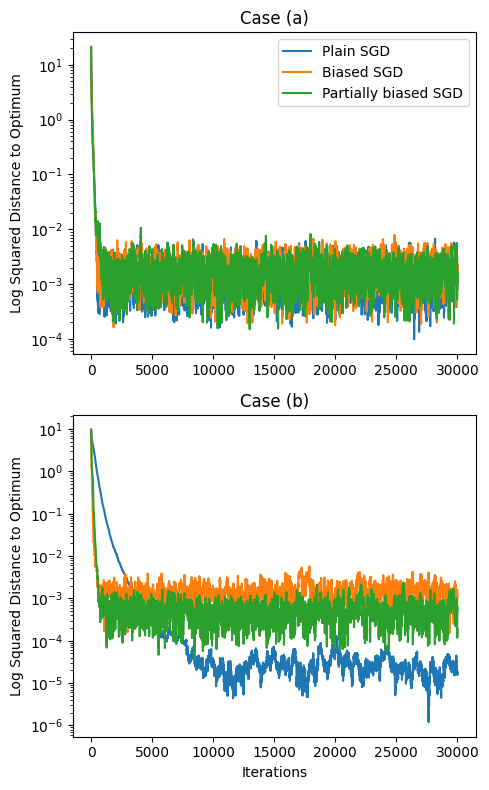

In [16]:
# Parameters
n = 20  # number of samples
p = 10    # dimension of theta
np.random.seed(42)  # for reproducibility

# Generate data for Case (a)
def generate_data_a(n, p):
    X = np.random.normal(0, 1, (n, p))
    theta_0 = np.random.normal(0, 1, p)
    epsilon = np.random.normal(0, 0.1, n)
    y = X @ theta_0 + epsilon
    return X, y, theta_0

# Generate data for Case (b)
def generate_data_b(n, p):
    X = np.random.normal(0, 1, (n - 1, p))
    X_last = np.random.normal(0, 10, (1, p))
    X = np.vstack([X, X_last])
    theta_0 = np.random.normal(0, 1, p)
    epsilon = np.random.normal(0, 0.1, n)
    y = X @ theta_0 + epsilon
    return X, y, theta_0

# Gradient computation
def compute_gradient(X, y, theta):
    residuals = X @ theta - y
    grad = X.T @ residuals
    return grad


# Biased SGD
def biased_sgd(X, y, theta_opt, theta_init, learning_rate, iterations, prob):
    theta = theta_init.copy()
    dist_to_opt = []
    for _ in range(iterations):
        dist_to_opt.append(np.linalg.norm(theta - theta_opt)**2)
        # Sample index according to probabilities
        i = np.random.choice(len(y), p=prob)
        grad = compute_gradient(X[i:i+1], y[i:i+1], theta)
        theta -= learning_rate/prob[i] * grad
    return theta, dist_to_opt

# Generate data for each case
cases = [generate_data_a, generate_data_b]
case_labels = ['Case (a)', 'Case (b)']

# Simulation parameters
iterations = 3*10**4

fig, ax = plt.subplots(2,1, figsize=(5, 8))

for i, case in enumerate(cases):
    # Generate data
    X, y, theta_0 = case(n, p)
    theta_opt = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # Compute sampling probabilities
    norms = np.linalg.norm(X, axis=1)
    Ls = norms**2

    uniform_prob = np.ones(n) / n
    biased_prob = Ls / np.sum(Ls)
    partially_biased_prob = 1/2*uniform_prob + 1/2*biased_prob
    
    theta_init = np.zeros(p)

    if i==0:
        learning_rate = 3*10**(-3)
    if i==1:
        learning_rate = 10**(-4)
    _, dist_plain = biased_sgd(X, y, theta_opt, theta_init, learning_rate,
                                   iterations, uniform_prob)

    if i==0:
        learning_rate = 3*10**(-3)
    if i==1:
        learning_rate = 10**(-3)
    _, dist_biased = biased_sgd(X, y, theta_opt, theta_init, learning_rate,
                                    iterations, biased_prob)

    if i==0:
        learning_rate = 3*10**(-3)
    if i==1:
        learning_rate = 10**(-3)
    _, dist_partially_biased = biased_sgd(X, y, theta_opt, theta_init, learning_rate, 
                                              iterations, partially_biased_prob)
    
    # Plot results
    ax[i].semilogy(dist_plain, label='Plain SGD')
    ax[i].semilogy(dist_biased, label='Biased SGD')
    ax[i].semilogy(dist_partially_biased, label='Partially biased SGD')
    ax[i].set_ylabel('Log Squared Distance to Optimum')
    ax[i].set_title(case_labels[i])
    
ax[0].legend()
ax[1].set_xlabel('Iterations')
plt.tight_layout()
plt.show()


In [17]:
fig.savefig('importance_large_ss.pdf', format='pdf', bbox_inches='tight')

The biased algorithms have a clear advantage to reach a low target precision $\varepsilon = 10^{-1}$. The non-biaised algorithm is limited in the stepsize by its stability. 

### Equal stepsizes for each algorithm

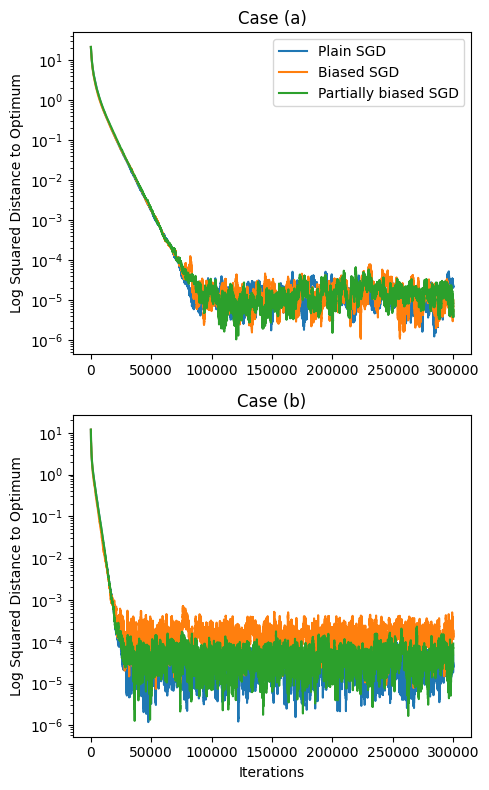

In [18]:
# Parameters
n = 20  # number of samples
p = 10    # dimension of theta
np.random.seed(42)  # for reproducibility

# Generate data for Case (a)
def generate_data_a(n, p):
    X = np.random.normal(0, 1, (n, p))
    theta_0 = np.random.normal(0, 1, p)
    epsilon = np.random.normal(0, 0.1, n)
    y = X @ theta_0 + epsilon
    return X, y, theta_0

# Generate data for Case (b)
def generate_data_b(n, p):
    X = np.random.normal(0, 1, (n - 1, p))
    X_last = np.random.normal(0, 10, (1, p))
    X = np.vstack([X, X_last])
    theta_0 = np.random.normal(0, 1, p)
    epsilon = np.random.normal(0, 0.1, n)
    y = X @ theta_0 + epsilon
    return X, y, theta_0

# Gradient computation
def compute_gradient(X, y, theta):
    residuals = X @ theta - y
    grad = X.T @ residuals
    return grad


# Biased SGD
def biased_sgd(X, y, theta_opt, theta_init, learning_rate, iterations, prob):
    theta = theta_init.copy()
    dist_to_opt = []
    for _ in range(iterations):
        dist_to_opt.append(np.linalg.norm(theta - theta_opt)**2)
        # Sample index according to probabilities
        i = np.random.choice(len(y), p=prob)
        grad = compute_gradient(X[i:i+1], y[i:i+1], theta)
        theta -= learning_rate/prob[i] * grad
    return theta, dist_to_opt

# Generate data for each case
cases = [generate_data_a, generate_data_b]
case_labels = ['Case (a)', 'Case (b)']

# Simulation parameters
iterations = 3*10**(5)

fig, ax = plt.subplots(2,1, figsize=(5, 8))

for i, case in enumerate(cases):
    # Generate data
    X, y, theta_0 = case(n, p)
    theta_opt = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # Compute sampling probabilities
    norms = np.linalg.norm(X, axis=1)
    Ls = norms**2

    uniform_prob = np.ones(n) / n
    biased_prob = Ls / np.sum(Ls)
    partially_biased_prob = 1/2*uniform_prob + 1/2*biased_prob
    
    theta_init = np.zeros(p)

    if i==0:
        learning_rate = 3*10**(-5)
    if i==1:
        learning_rate = 10**(-4)
    _, dist_plain = biased_sgd(X, y, theta_opt, theta_init, learning_rate,
                                   iterations, uniform_prob)

    if i==0:
        learning_rate = 3*10**(-5)
    if i==1:
        learning_rate = 10**(-4)
    _, dist_biased = biased_sgd(X, y, theta_opt, theta_init, learning_rate,
                                    iterations, biased_prob)

    if i==0:
        learning_rate = 3*10**(-5)
    if i==1:
        learning_rate = 10**(-4)
    _, dist_partially_biased = biased_sgd(X, y, theta_opt, theta_init, learning_rate, 
                                              iterations, partially_biased_prob)
    
    # Plot results
    ax[i].semilogy(dist_plain, label='Plain SGD')
    ax[i].semilogy(dist_biased, label='Biased SGD')
    ax[i].semilogy(dist_partially_biased, label='Partially biased SGD')
    ax[i].set_ylabel('Log Squared Distance to Optimum')
    ax[i].set_title(case_labels[i])
    
ax[0].legend()
ax[1].set_xlabel('Iterations')
plt.tight_layout()
plt.show()

In [19]:
fig.savefig('importance_equal_ss.pdf', format='pdf', bbox_inches='tight')

Using equal stepsizes, the initial decay remains the same. The biaised algorithms suffer from increased additive noise. In the case of the partially biased algorithm, this effect is kept relatively mild. 